# Project: Investigate a Dataset (TMBb Movie Data Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data that is investigated is TMDb movie data that contains information for about 10,000 movies. Certain movies have high popularity and high revenue while some have not. Using the data provided, investigation can be done to study kinds of attributes that can lead to more popular movie and better movie's revenue. This report will focus on answering three questions:

1) Which genres are most popular from year to year? 

2) How do movies' released month related with movies popularity?

3) How does cast associate with revenue?

4) How other properties are associated with movies' revenues?


In [100]:
# Use this cell to set up import statements for all of the packages that planned to use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [101]:
# Load data
df = pd.read_csv('tmdb-movies.csv')

From table below, it is noticed that columns - cast, director, genres, production companies has multiple values that are separated by '|'. 

In [102]:
# View the first 5 rows of data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The list below shows all the columns in the table

In [103]:
# Displays all the columns available in the data
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

From the info below, 9 columns has null value, release date column has string data type rather than datetime datatype.

In [104]:
# View data type of each column and find out the columns that has null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [105]:
# Display the shape of table. The table has 10866 row and 21 columns
df.shape

(10866, 21)

### Data Cleaning

This section works on cleaning the data so that it can be used for analysis. The cleaning process involves:

1) Remove uneccessary columns that is not useful for the investigation

2) Check and remove duplicates

3) Remove null values in the data

4) Further refining data so that it can have accurate representation

5) Check and change the appropriate datatype 

6) Split the values in the cells that seperated by '|'


In [106]:
# Delete uneccessary columns that will not be analysis in this project

df.drop(['id','budget','revenue','imdb_id','homepage','tagline','keywords','overview'],axis = 1,inplace = True)

In [107]:
# Check duplicate
df.duplicated().sum()
# Drop duplicate
df.drop_duplicates(inplace = True)

In this investigation, the adjusted budget and revenue based on 2010 dollars are used instead of their orignal budget and revenue.

It is noticed that in budget_adj and revenue_adj columns, there are some rows with zero values. It is assumed that those zero values are not the actual figures for the movies.

In [108]:
# Show revenue_adj and budget_adj columns with zero values
df[(df['budget_adj'] == 0) | (df['revenue_adj'] == 0)].head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,3.358321,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,2.932340,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,2.331636,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,2.272044,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04


The zero values in budget_adj and revenue_adj are replaced with null value

In [109]:
# Replace zero in budget_adj and revenue_adj as null value
df['budget_adj']=np.where(df['budget_adj']==0,np.nan,df['budget_adj'])
df['revenue_adj']=np.where(df['revenue_adj']==0,np.nan,df['revenue_adj'])


In [110]:
# Showing number of null values in budget_adj and revenue_adj columns
df.budget_adj.isnull().sum(),df.revenue_adj.isnull().sum()

(5696, 6016)

In [111]:
# Check number of row is null
df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

Since budget_adj and revenue_adj columns has a lot of null value which consist of roughly half of the data, deleting those rows might affect the accuracy of the investigation results.

Thus, the rows with null value in these two columns are kept as for now.

In [112]:
# Drop row with null value at cast, director and genres columns
df.dropna(subset=['cast','director','genres','production_companies'],inplace =True)

In [113]:
# Showing sum of null value in each column
# Rows with null value in budget and revenue columns are not deleted
df.isnull().sum()

popularity                 0
original_title             0
cast                       0
director                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              4751
revenue_adj             5022
dtype: int64

The current release_date data type is string and it needed to be changed to datetime data type.

In [114]:
# Clean data type
df.dtypes

popularity              float64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [115]:
# Convert datatyep
df.release_date = pd.to_datetime(df.release_date)

In [116]:
# Final shape of data after cleaning
df.shape

(9772, 13)

As noticed before, the columns -  cast, director, production companies and genres contain multiple values separated by '|'. Those values will need to be separated.

In [117]:
# Split cast, director, production companies, genres strings that separated by '|'
# creating list of values in each respective cell.
columns = ['cast','director','production_companies','genres']

for i in columns:
    df[i] = df[i].apply(lambda x:x.split('|'))


The rows in cast, genres, production companies and director are now consisted of list of values.

In [118]:
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


Lastly, it is also found out that some of the movies have extremely low revenue with minimum as low as 2.37. There are around 64 movies with revenue for just less than 5,000. 

There is no clear reason on why those movies have such low revenue. However, this current project will not clean those extreme values and will assume those values as the actual data for the movies.

In [119]:
df.revenue_adj.dropna().describe()

count    4.750000e+03
mean     1.173732e+08
std      2.002779e+08
min      2.370705e+00
25%      1.163858e+07
50%      4.584735e+07
75%      1.349884e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [120]:
df.revenue_adj.dropna()[df.revenue_adj<5000].count()

64

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Which genres are most popular from year to year?

Since genres consists of cell with list of values, two functions are created to get information from the lists.

Function full_list creates a series that contain all of the genres values from genres columns.

Function checker takes the genre's name and return true value for cells contain the specified genre.

In [121]:
# Functions that create list of items in the column and comverted to series
def full_list(x):
    
    new = []
    for i in x:
    
        for j in i:
            new.append(j)
            
    s1 = pd.Series(new)
    return s1
        
    

In [122]:
# Functions that return true if the cell contain the item
def checker(x,item):
    
    for i in x:
        if item in i:
            return  True
    return False
        

First, the distribution of the movie's genres are analysed.

In [123]:
# Get the count of each genre category
s_genres = full_list(df.genres)
bar_genres = s_genres.value_counts()

Figure below shows the total count of each movie's genres. There are total of 20 genres. The highest number of movie's genre from the data is drama, followed by comedy, then thiller. The lowest count of movie's genre is foreign.

Text(0.5,1,'Total count of each movies genres')

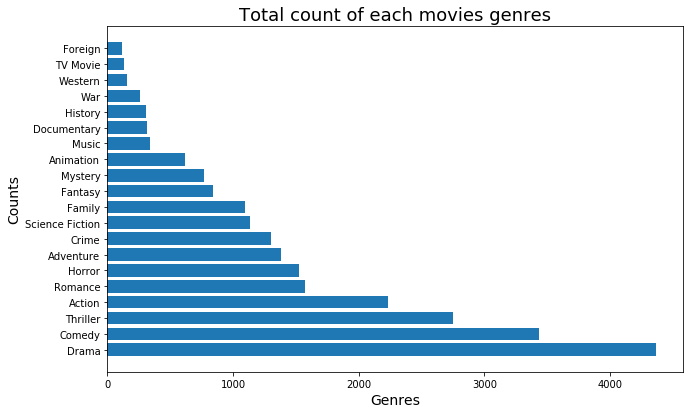

In [124]:
fig = plt.figure(figsize = [10,6])
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.barh(bar_genres.index,bar_genres.values)
ax.set_xlabel('Genres',fontsize =14)
ax.set_ylabel('Counts',fontsize =14)
ax.set_title('Total count of each movies genres',fontsize =18)


Next, the popularity's spread on each genres are analysed.

In [125]:
# Finding overall popularity of each genres
# Uni_genres - get the unique 20 genres
# box_gen -  get the list of movie's popularity for the 20 unique genres
uni_genres = set(s_genres)
box_gen = list()
for v in uni_genres:
    
    box_gen.append(df[df.genres.apply(lambda x : checker(x,v))]['popularity'])


In [126]:
# Calculate the median of popularity for each unique genres
median = list()
for i, v in enumerate(box_gen):
    
    median.append(round(np.median(v),3))

s = pd.Series(median,index=uni_genres)

Information below shows the median popularity for each genre. 
The adventure movie has the highest median popularity, followed by fantasy and animation.

In [127]:
s.sort_values(ascending =False)

Adventure          0.600
Fantasy            0.573
Animation          0.559
Family             0.508
Action             0.504
Crime              0.497
Science Fiction    0.481
Thriller           0.471
Mystery            0.455
History            0.453
War                0.450
Comedy             0.426
Romance            0.424
Drama              0.416
Music              0.360
Western            0.346
Horror             0.332
TV Movie           0.266
Documentary        0.186
Foreign            0.172
dtype: float64

The box plots below show the popularity's for each genres. Adventures' movie shows largest spread of popularity with more movies at high popularity.  Movies that have overall low popularity distribution are documentary and foreign.

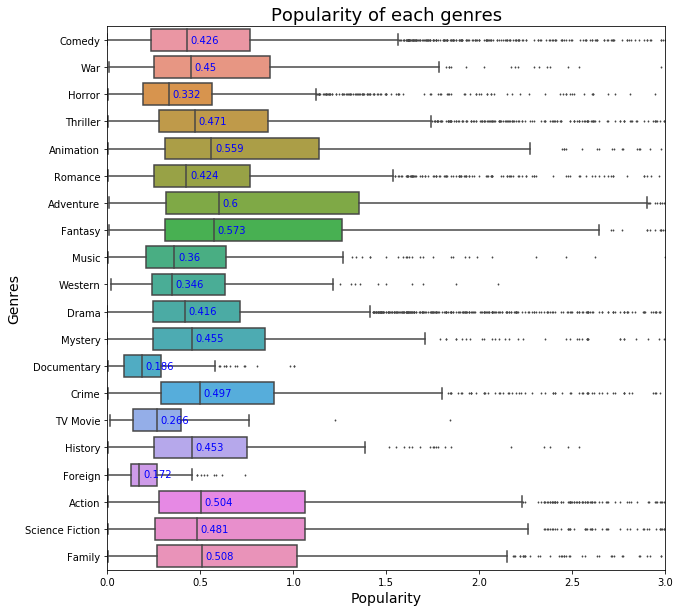

In [128]:
# Limit view of outlier for better visualization
f,ax = plt.subplots(figsize = [10,10])
sns.boxplot(data = box_gen,orient = 'h',fliersize = 1)
ax.set_xlim(0,3)
ax.set_yticklabels(uni_genres)
ax.set_xlabel('Popularity',fontsize =14)
ax.set_ylabel('Genres',fontsize =14)
ax.set_title('Popularity of each genres',fontsize =18)



# Median of each genres
for i, v in enumerate(box_gen):
    
    median = round(np.median(v),3)
    ax.text(median+0.02, i+0.1 , str(median), color='blue')

To know which genre are most popular every year, popularity's rankings are assigned every year. Then, the number of times each genre that rank number 1 in each year are calculated.

In [129]:
# Function to rank popularity of the movie

def ranking (df,column):
    df.sort_values(column,ascending = False,inplace = True)
    df[column+'_ranking'] = np.arange(len(df))+1
    return df

In [130]:
df_genres = df.iloc[:,np.r_[0,5,7,10]]

In [131]:
df_genres.head()

,popularity,genres,release_date,release_year
0,32.985763,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,2015
1,28.419936,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,2015
2,13.112507,"[Adventure, Science Fiction, Thriller]",2015-03-18,2015
3,11.173104,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,2015
4,9.335014,"[Action, Crime, Thriller]",2015-04-01,2015


In [132]:
# Group the movie by release year and give the ranking on popularity
df_genres_ranking = df_genres.groupby('release_year').apply(lambda x : ranking(x,'popularity'))
df_genres_ranking.head()

popularity                        genres release_date  \
release_year                                                                
1960         10141    2.610362     [Drama, Horror, Thriller]   2060-08-14   
             10142    1.872132  [Action, Adventure, Western]   2060-10-23   
             10143    1.136943      [Action, Drama, History]   2060-10-06   
             10144    0.947307      [Comedy, Drama, Romance]   2060-06-15   
             10145    0.875173             [Comedy, Romance]   2060-10-07   

                    release_year  popularity_ranking  
release_year                                          
1960         10141          1960                   1  
             10142          1960                   2  
             10143          1960                   3  
             10144          1960                   4  
             10145          1960                   5

In [133]:
# Get movies that rank no. 1 in each year
gen_rank1 = df_genres_ranking.query('popularity_ranking == 1')
gen_rank1.head()

,,popularity,genres,release_date,release_year,popularity_ranking
release_year,,,,,,
1960,10141,2.610362,"[Drama, Horror, Thriller]",2060-08-14,1960,1
1961,10110,2.631987,"[Adventure, Animation, Comedy, Family]",2061-01-25,1961,1
1962,9849,3.170651,"[Adventure, Action, Thriller]",2062-10-04,1962,1
1963,10438,2.508235,"[Action, Thriller, Adventure]",2063-10-11,1963,1
1964,9881,3.153791,"[Adventure, Action, Thriller]",2064-09-17,1964,1


In [134]:
# Count each genres category that rank no. 1 in each year
count = list()
for v in uni_genres:
    
    count.append(gen_rank1.genres.apply(lambda x : checker(x,v)).sum())

bar_d = pd.Series(count,index=uni_genres)

In [135]:
bar_d.sort_values(ascending=False)

Adventure          31
Action             28
Thriller           20
Science Fiction    20
Drama              14
Family             11
Fantasy            10
Animation           8
Crime               7
Comedy              6
Mystery             3
Romance             3
Horror              3
Music               2
Documentary         0
TV Movie            0
History             0
Foreign             0
War                 0
Western             0
dtype: int64

Figure below show total count of yearly most popular movie's genre. Adventure movies has most counts followed by action, then thriller and science fiction. History, foreign, documentary, western, tv movie and war movie's genres never have chance to be the most popular movie of the year. 

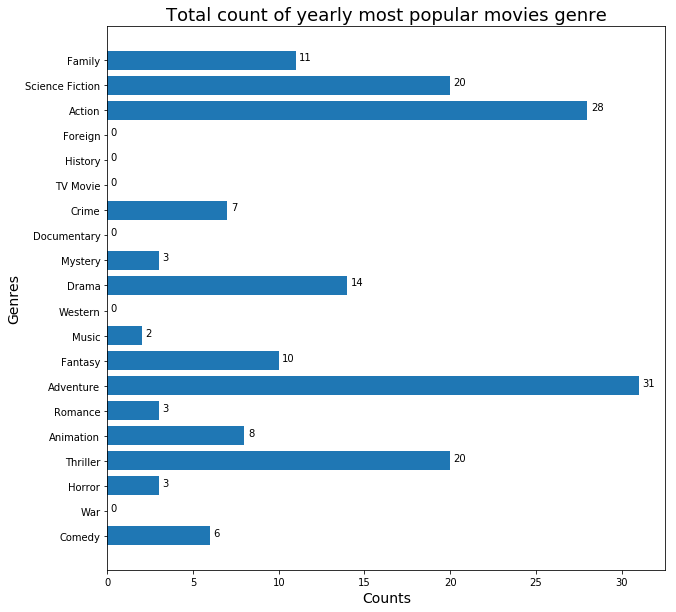

In [136]:
#bar plot for count each genres cateogry that rank first in popularity each year

fig, ax = plt.subplots(figsize=[10,10])
width = 0.75
ax.barh(bar_d.index, bar_d.values,width)
ax.set_xlabel('Counts',fontsize =14)
ax.set_ylabel('Genres',fontsize =14)
ax.set_title('Total count of yearly most popular movies genre',fontsize =18)
for i, v in enumerate(count):
    ax.text(v + 0.2, i , str(v), color='black')

### Research Question 2 : Do movies' released month related with movies popularity??

In [38]:
# Copy new dataframe
df_month = df.copy()

In [39]:
# Remove unneccessary columns
df_month = df_month.iloc[:,np.r_[0,7]]

In [40]:
# Get month from release date
df_month['month']=df_month['release_date'].dt.month

In [44]:
df_month.head()

,popularity,release_date,month
0,32.985763,2015-06-09,6
1,28.419936,2015-05-13,5
2,13.112507,2015-03-18,3
3,11.173104,2015-12-15,12
4,9.335014,2015-04-01,4


The data is grouped by month to get the median of the popularity in every months.
For top 10 percent of popularity, the data is also grouped by months to count the total movies per release months.


In [45]:
# Calculate median of popularity in each month
month_median = df_month.groupby('month').median()
#month_median.sort_values('popularity',ascending =False)

In [47]:
# For top ten percent of popularity, calculated count of movies release months.
top_ten_per = df.popularity.quantile(0.9)
count_m = df_month.query('popularity >= {}'.format(top_ten_per)).groupby('month')['popularity'].count()
count_m

month
1      41
2      49
3      69
4      55
5     100
6     116
7      94
8      66
9      80
10     85
11     97
12    126
Name: popularity, dtype: int64

Figure left shows the median of movie'a popularity in each month whereas figure right shows the movie counts with high popularity (top 10 percent) in each month. From these figures, movies that are released in around Jun, July and December has higher median popularity. In those months, there are more counts of movies with high popularity. This could be likely due to the holiday seasons or school break occurred during those periods.

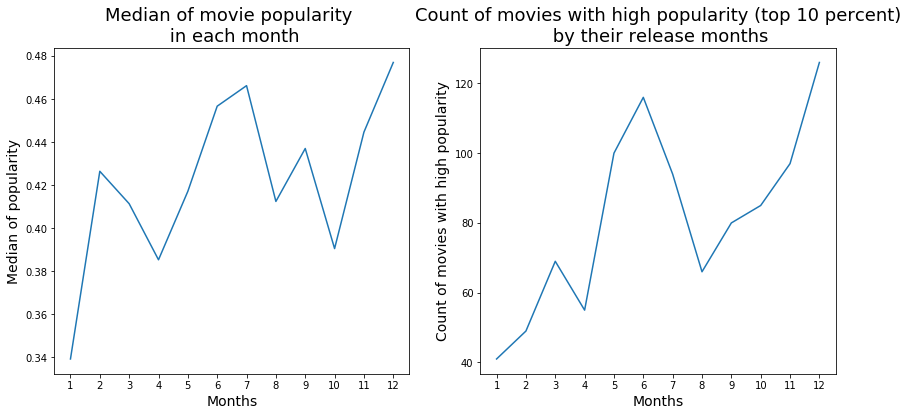

In [48]:
fig,ax = plt.subplots(1,2,figsize=(14,6))

ax[0].plot(month_median.index,month_median.values)
ax[0].set_xlabel('Months',fontsize =14)
ax[0].set_ylabel('Median of popularity',fontsize =14)
ax[0].set_title('Median of movie popularity \n in each month',fontsize =18)
ax[0].set_xticks(np.arange(1, 13))

ax[1].plot(count_m.index,count_m.values)
ax[1].set_xlabel('Months',fontsize =14)
ax[1].set_ylabel('Count of movies with high popularity',fontsize =14)
ax[1].set_title('Count of movies with high popularity (top 10 percent)\n by their release months',fontsize =18)
ax[1].set_xticks(np.arange(1, 13))

plt.show()

### Research Question 3 : How does cast associate with revenue?

To investigate revenue, the null value in the revenue will need to be removed.

In [49]:
# Copy new dataframe
df_new = df.copy()

In [50]:
# Remove the null value
df_new.dropna(inplace = True)

The first investigation analyse the actor/actress whose movies are in top 20 percent revenue.
The cast names and the counts of number of movies in top 20 percent revenue are calculated.
Since there are too many cast names, only the names with 10 or more movies are displayed.


In [59]:
# Get series of cast names where their movie revenue is in top 20 percent
top_20_per = df_new.revenue_adj.quantile(0.80)
cast_20 = df_new.query('revenue_adj >= {}'.format(top_20_per))
s_cast_20 = full_list(cast_20.cast)

# Obtain count of each cast name whose has movie revenue in top 20 percent 
count_c_20 = s_cast_20.value_counts()
count_c_20.head()

Tom Cruise            25
Tom Hanks             18
Bruce Willis          16
Cameron Diaz          15
Sylvester Stallone    14
dtype: int64

In [60]:
# Remove those cast with < 10 counts
count_c_20 = count_c_20[count_c_20.values >= 10]

Bar plot below shows the name of actor/actress who have 10 or more movies in top 20 percent revenue. The highest count of movies are Tom Cruise, followed by Tom Hanks, Bruce Wills and Cameron Diaz. They all has highest number of movies that generated high revenue. However, this does not mean all of their movie will have high revenue. Thus, following analysis will calculate the median of revenue of all the actor/actress.

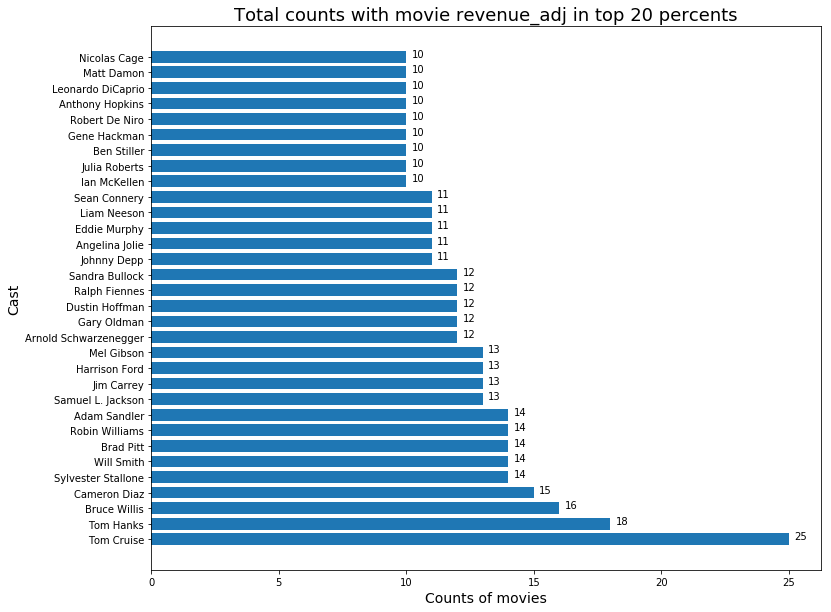

In [137]:
#bar plot for count for each cast with movie revenue ratio in top 20 percents
fig, ax = plt.subplots(figsize=[12,10])
width = 0.75
ax.barh(count_c_20.index, count_c_20.values,width)
ax.set_xlabel('Counts of movies',fontsize =14)
ax.set_ylabel('Cast',fontsize =14)
ax.set_title('Total counts with movie revenue_adj in top 20 percents',fontsize =18)
for i, v in enumerate(count_c_20):
    ax.text(v + 0.2, i , str(v), color='black')

The second investigation calculates the median of revenue and popularity for each actor/actress. Only those actor/actress with 10 or more movies are considered for the analysis. 

Also, since there are too many cast name (total of 17124 names), only top 20 median revenue are shown.

In [62]:
# Create list of revenue and popularity for each cast
uni_cast = set(full_list(df.cast))
rev_cast = list()
pop_cast = list()

for v in uni_cast:
    
    rev_cast.append(df_new[df_new.cast.apply(lambda x : checker(x,v))]['revenue_adj'])
    pop_cast.append(df[df.cast.apply(lambda x : checker(x,v))]['popularity'])

  

In [63]:
# Number of unique cast names
len(uni_cast)

17124

In [64]:
# Calculate median revenue and median popularity for each cast
# Calculate total movie for each cast
median_rev = list()
median_pop = list()
total_rev =list()
total_pop = list()
for v in rev_cast:
    
    median_rev.append(np.median(v))
    total_rev.append(len(v))
    
for v in pop_cast:
    
    median_pop.append(round(np.median(v),3))
    total_pop.append(len(v))

d = pd.DataFrame({'median_revenue':median_rev,'total_movies_revenue': total_rev,
                 'median_popularity':median_pop,'total_movies_popularity':total_pop},index=uni_cast)

/Users/wangmingxiu/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/wangmingxiu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Table below shows the last 5 row of new dataframe which consist of median of revenue and popularity. The total movies revenue means the total number of movies in median revenue calculation and the total movies popularity means the total number of movies for each cast name in median popularity calculation. 

The number of total movies revenue and total movie popularity are different because median revenue are calculated with less data where the row with null value in revenue_adj columns are dropped. The median popularities are calculated with more data where the null value in revenue_adj are not deleted.

In [76]:
d.tail()

,median_revenue,total_movies_revenue,median_popularity,total_movies_popularity
Miiko Taka,NaN,0,0.239,1
Werner Herzog,2.073677e+08,1,0.341,5
Henry Goodman,1.603843e+08,1,0.287,3
Michael Parks,1.376719e+06,2,0.389,8
A.J. Cook,6.040680e+07,2,0.698,4


In [77]:
# Take only the casts that have more than 10 movies 
d_rev = d[d.total_movies_revenue >= 10]

In [78]:
# Get only the top 20 median revenue
d_rev = d_rev.sort_values('median_revenue',ascending = False).iloc[0:20,:]

Figure below shows the median of revenue and popularity for the cast in top 20 median revenue. Comparing the median in movie revenue, Daniel Radcliffe and Emma Watson rank highest. In term of popularity, both of their movies also show relatively much higher popularity compared to others.

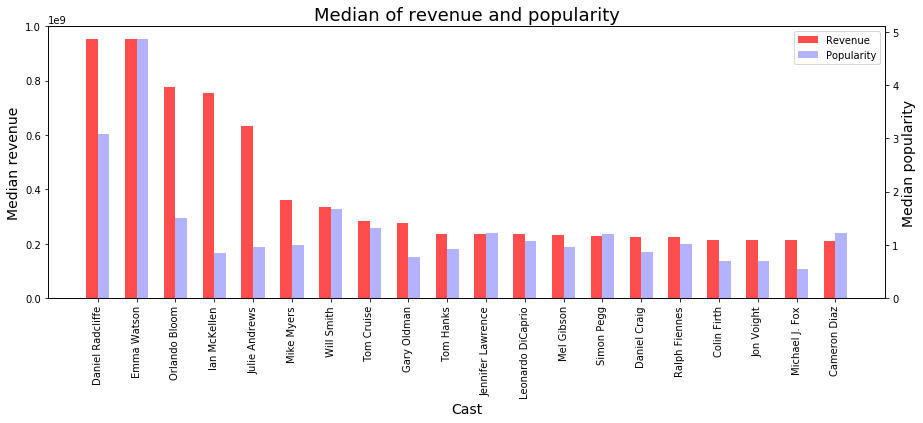

In [80]:
# Plotting bar

ind = np.arange(len(d_rev))
width = 0.3
# plot bars
fig1, ax1 = plt.subplots(figsize=[15,5])
rev_bar = ax1.bar(ind, d_rev.median_revenue, width, color='r',alpha = 0.7)
# title and labels
ax1.set_ylabel('Median revenue',fontsize =14)
ax1.set_xlabel('Cast',fontsize =14)
ax1.set_title('Median of revenue and popularity',fontsize =18)
plt.xticks((ind + width/2),d_rev.index,rotation = 'vertical')

ax2=ax1.twinx()
# fig1, ax2 = plt.subplots(figsize=[15,5])
pop_bar = ax2.bar(ind+width, d_rev.median_popularity, width, color='blue',alpha =0.3)
# title and labels
ax2.set_ylabel('Median popularity',fontsize =14)

plt.legend([rev_bar,pop_bar],['Revenue','Popularity'])




### Research Question 4 : How other properties are associated with movies' revenues?

Clustermap on linear correlation between each variable is plotted. From the figure, the adjusted revenue shows relatively stronger correlation with vote count, popularity and budget.

In [89]:
# Get month from release date
df_new['month']=df_new['release_date'].dt.month

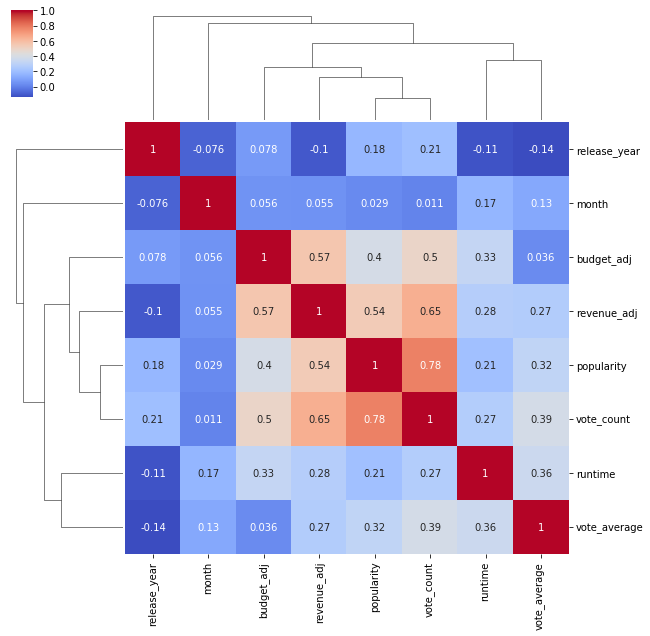

In [90]:
# Plot clustermap on linear correlation between each factor
sns.clustermap(df_new.corr(),annot=True,cmap = 'coolwarm')

Figure below shows the boxplot popularity, revenue, runtime and vote average. From the figure, the data in popularity, revenue and runtime has a lot of outlier.

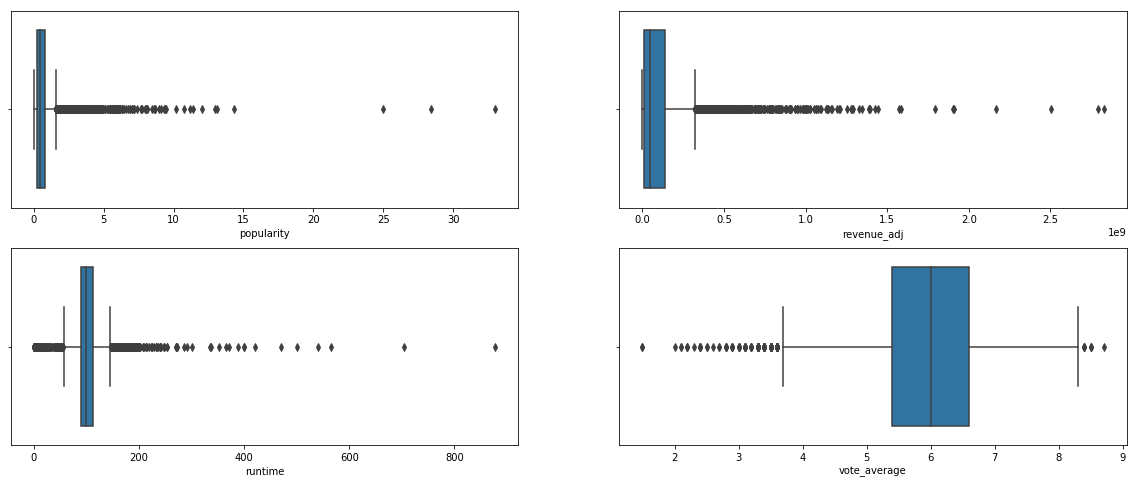

In [91]:
# View the box plot for popularity, revenue, runtime and vote average.
f,ax = plt.subplots(2,2,figsize = [20,8])
sns.boxplot(df.popularity,ax=ax[0,0])
sns.boxplot(df.revenue_adj,ax=ax[0,1])
sns.boxplot(df.runtime,ax=ax[1,0])
sns.boxplot(df.vote_average,ax=ax[1,1])


Outliers in the data are removed using the [standard deviation method](https://medium.com/@dhwajraj/learning-python-regression-analysis-part-7-handling-outliers-in-data-d36ee9e2130b). The data outside three times standard deviation from the mean is considered an outlier and is removed.

In [92]:
# Remove the outlier. Assign the outlier with null value
df_outlier = df_new.copy()
columns = ['popularity','runtime','vote_count','vote_average','release_year','budget_adj','revenue_adj']
for i in columns:
    
    df_outlier[i] =df_new[i].where(abs(df_new[i]-df_new[i].mean())<(3*df_new[i].std()) )


In [93]:
# Drop the null value
df_clean = df_outlier.dropna()

Figure below shows the boxplot popularity, revenue, runtime and vote average and the outliers has been reduced compared to original data.

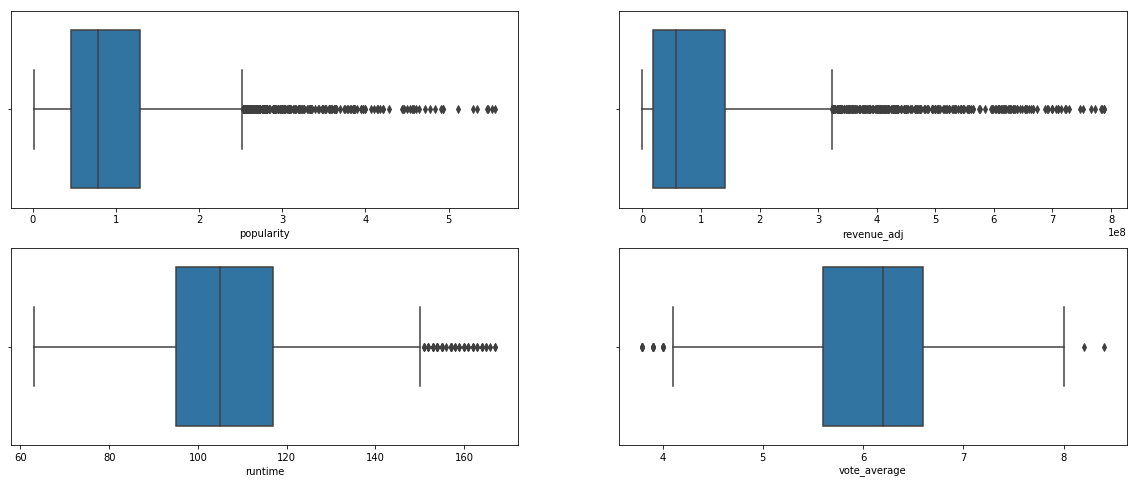

In [94]:
# Display boxplot after removing the outlier
f,ax = plt.subplots(2,2,figsize = [20,8])
sns.boxplot(df_clean.popularity,ax=ax[0,0])
sns.boxplot(df_clean.revenue_adj,ax=ax[0,1])
sns.boxplot(df_clean.runtime,ax=ax[1,0])
sns.boxplot(df_clean.vote_average,ax=ax[1,1])

The clustermap of linear correlation between each factor is again plotted. The correlation between revenue and popularity, vote count and budget has reduced slightly.

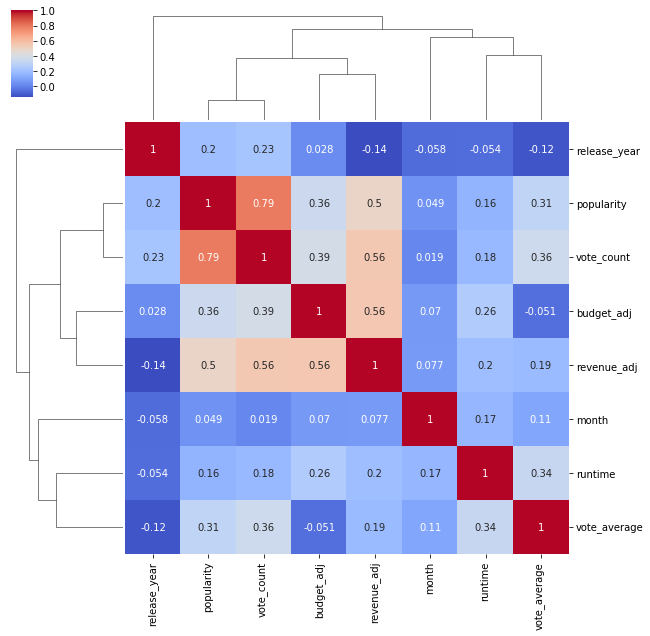

In [95]:
# Plot clustermap on linear correlation between each factor without outlier
sns.clustermap(df_clean.corr(),annot=True,cmap = 'coolwarm')

/Users/wangmingxiu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Revenue'), Text(0.5,0,'Budget')]

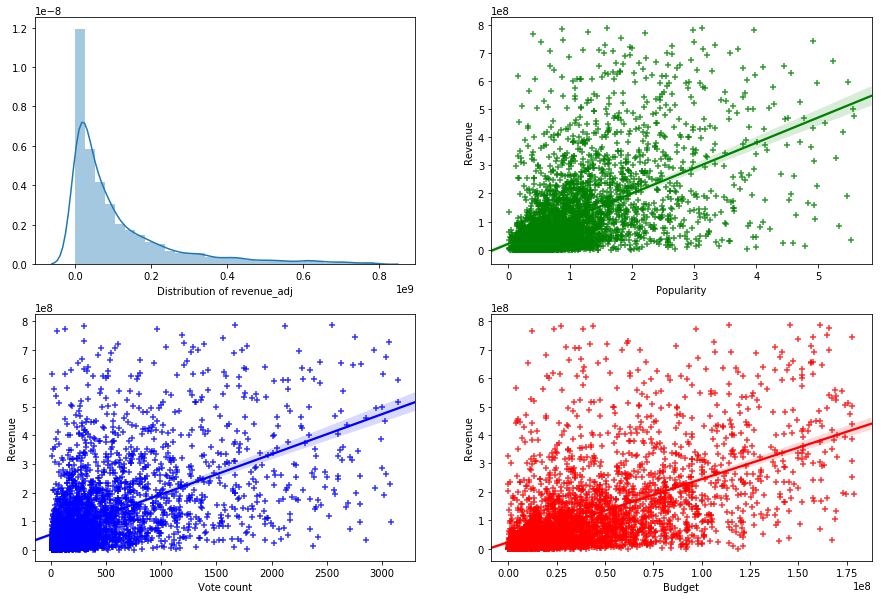

In [96]:
# Plot revenue distribution plot and scatter plot between revenue and popularity, vote count and budget
f,ax = plt.subplots(2,2,figsize = [15,10])
sns.distplot(df_outlier.revenue_adj.dropna(),ax=ax[0,0],bins =30,axlabel='Distribution of revenue_adj')
sns.regplot(x = df_outlier.popularity, y = df_outlier.revenue_adj, data = df_outlier, ax=ax[0,1],color='g',marker='+')  
sns.regplot(x = df_outlier.vote_count, y = df_outlier.revenue_adj, data = df_outlier, ax=ax[1,0],color='b',marker='+') 
sns.regplot(x = df_outlier.budget_adj, y = df_outlier.revenue_adj, data = df_outlier, ax=ax[1,1],color='r',marker='+') 
ax[0,1].set(xlabel='Popularity',ylabel='Revenue')
ax[1,0].set(xlabel='Vote count',ylabel='Revenue')
ax[1,1].set(xlabel='Budget',ylabel='Revenue')


First figure above shows the distribution plot for adjusted movie's revenue. The revenue distribution is skew to right where more movies has relatively low revenue and the number of movies is reducing with increasing revenue.

As discussed before, the properties popularity, vote count and budget has much higher linear correlation with revenue. The scatter plots between each of the properties with revenue are drawn. The linear lines in the plots represent the regression line with the translucent bands represents the 95% confidence interval on regression estimate. All popularity, vote count and budget show positive regression line with the revenue.

From the figures, high concentration of movies with lower revenue are noticed when popularity, vote count or budget are low. Thus, there are higher chances that with low vote count, budget or popularity the movie's revenue will be low.

[Text(0,0.5,'Revenue'), Text(0.5,0,'Month')]

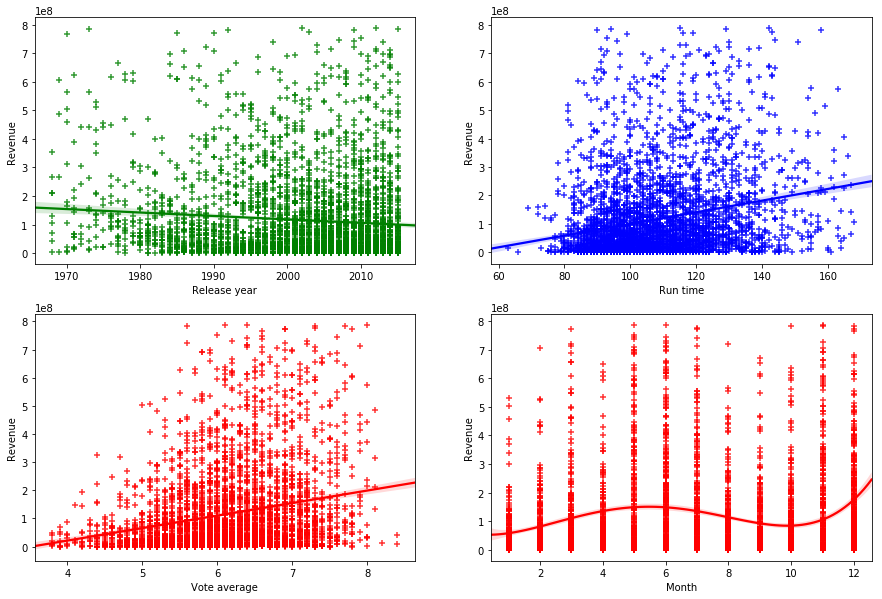

In [97]:
# Scatter plot between revenue with release year, runtime, vote average and month
f,ax = plt.subplots(2,2,figsize = [15,10])
sns.regplot(x = df_outlier.release_year, y = df_outlier.revenue_adj, data = df_outlier, ax=ax[0,0],color='g',marker='+')  
sns.regplot(x = df_outlier.runtime, y = df_outlier.revenue_adj, data = df_outlier, ax=ax[0,1],color='b',marker='+',order=1) 
sns.regplot(x = df_outlier.vote_average, y = df_outlier.revenue_adj, data = df_outlier, ax=ax[1,0],color='r',marker='+',order=1) 
sns.regplot(x = df_outlier.month, y = df_outlier.revenue_adj, data = df_outlier, ax=ax[1,1],color='r',marker='+',order=4) 
ax[0,0].set(xlabel='Release year',ylabel='Revenue')
ax[0,1].set(xlabel='Run time',ylabel='Revenue')
ax[1,0].set(xlabel='Vote average',ylabel='Revenue')
ax[1,1].set(xlabel='Month',ylabel='Revenue')

From the previous calculation, the movie's release year, run time, vote average and month has much lower linear correlation.

Figures above show the scatter plots and the regression line between the movie's revenue and release year, run time, vote average and month.

It is hard to interpret the data from these scatter plot. For release year, the low revenue movies are concentrated at increase of year. For the movie runtime, the low and high revenue movie spread out between 80 to 140 mins. For vote average, movies with high revenue concentration at high vote average. Lastly, for month of release, the scatter plot does not show linear relationship with movie's revenue.

For better visualization, the median of movies' revenue in each release year, vote average, runtime and month are plotted below.

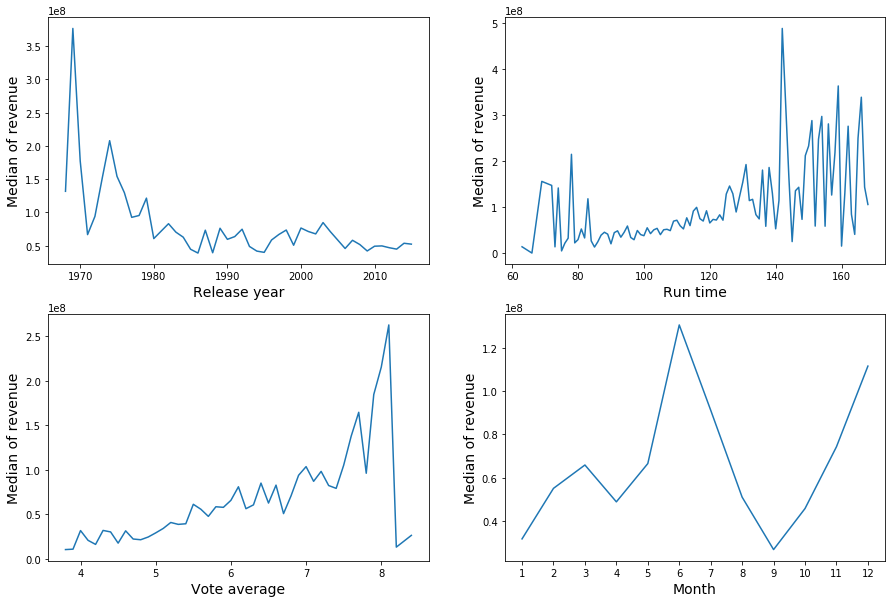

In [98]:
# Plot median of revenue in each release year, vote average, runtime and month
data_m=df_outlier.loc[:,['month','revenue_adj']].groupby('month').median()
data_y=df_outlier.loc[:,['release_year','revenue_adj']].groupby('release_year').median()
data_v=df_outlier.loc[:,['vote_average','revenue_adj']].groupby('vote_average').median()
data_r=df_outlier.loc[:,['runtime','revenue_adj']].groupby('runtime').median()

data_m.dropna(inplace = True)
data_y.dropna(inplace = True)
data_v.dropna(inplace = True)
data_r.dropna(inplace = True)

f,ax = plt.subplots(2,2,figsize = [15,10])

ax[0,0].plot(data_y.index,data_y.values)
ax[0,0].set_xlabel('Release year',fontsize =14)
ax[0,0].set_ylabel('Median of revenue',fontsize =14)
# ax[0,0].set_title('Median of movie revenue in each release year',fontsize =18)

ax[0,1].plot(data_r.index,data_r.values)
ax[0,1].set_xlabel('Run time',fontsize =14)
ax[0,1].set_ylabel('Median of revenue',fontsize =14)
# ax[0,1].set_title('Median of movie revenue in each run time',fontsize =18)
   
ax[1,0].plot(data_v.index,data_v.values)
ax[1,0].set_xlabel('Vote average',fontsize =14)
ax[1,0].set_ylabel('Median of revenue',fontsize =14)
# ax[1,0].set_title('Median of movie revenue per vote average',fontsize =18)

ax[1,1].plot(data_m.index,data_m.values)
ax[1,1].set_xlabel('Month',fontsize =14)
ax[1,1].set_ylabel('Median of revenue',fontsize =14)
# ax[1,1].set_title('Median of movie revenue in each month',fontsize =18)
ax[1,1].set_xticks(np.arange(1, 13))

plt.show()


Figures above show the median of revenue in different release year, run time, vote average and month.

There are 48 release year's groups, 100 runtime's groups, 46 vote average's group and 12 month's group for median calculation.

It can be seen that as the release year increased, the median of revenue has decreased in overall. There is a sharp drop in median at year around 1971.

For runtime, a lot of fluctuations on result are observed. The relationship between the runtime and revenue cannot be conclude with the current investigation.

For vote average, it is noticed that the overall trend of median revenue increase with increasing vote average. However, at high vote average (above 8.2 vote), the medium of revenue is low.

For month, as noticed in the scatter plot, the relationship between the revenue and month is not linear. The medium of revenue is high at mid of year and end of year. This is also highly correlated with medium of popularity vs month plot as discussed before where the popularity is higher during middle of year and end of the year.


In [99]:
data_y.index.nunique(),data_r.index.nunique(),data_v.index.nunique(),data_m.index.nunique()

(48, 100, 46, 12)

<a id='conclusions'></a>
## Conclusions

TMDb movie data that contains information for about 10,000 movies are investigated. From the investigation, the popularity of each movie's genre are analysed. There are total of 20 distinct genres available in the data. Adventure movies shows largest spread and highest median of popularity values. On the other hand, movies such as documentary and foreign has low median of popularity. The yearly most popular movie's genres are extracted from the data to examine which genre is most popular from year to year. From the analysis, adventure genre is most popular among all the movie's genres as it has the most count of movies that are yearly most popular movie.

The month of release for the movie might also has potential affect the movies performance. To study the effect of month of release, all of the movies are grouped by months and the median of the popularity for each month id calculated. High median popularity can be found in mid and end of the year. To further investigate the effect of months on popularity, the top 10 percent movies with high popularity ratings with their months of release are extracted. The result also shows that months in the mid and end of year has highest counts of movies that have high popularity rating.

The cast with high revenue movies are studied. Median of the movie revenue for all of the cast are computed and the top 20 cast with highest median of movie's revenue are identified. Among the top 20 cast, Daniel Radcliffe and Emma Watson movies has the most median of revenue.

Lastly, the relationship between other properties (popularity, budget, runtime, vote average, month, vote count, release year) and movies' revenue are investigated. The outlier from the data is removed and the linear correlation between each variable are calculated. The properties popularity, vote count and budget show higher positive correlation with revenue. The scatter plots between those properties and revenue are drawn. It is noticed most of the low revenue movie are concentrated at low popularity, vote count and budget. For the properties (runtime, release year, vote average, and month), the median of revenue in respective properties are examined. From the results, the median of revenue shows decreasing trend with increasing release year. On the other hand, the median of revenue shows increasing trend with increasing vote average and drops to very low value at vote average above 8.2. High median of revenue can also be noticed at months at mid and end of year. The current investigation could not conclude the effect of runtime on the revenue. In studying the effect of other properties with revenue, zero values in the revenue are treated by deleting the data. This has greatly reduce the sample size for the investigation and possibly would affect the investigation results. The current investigation also does not able to compare the significant effect of each of the properties on the movie revenue.

